In [5]:
import cv2
import os

def extract_frames(video_path, output_dir, every_n_frames=30):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("❌ Failed to load video!")
    else:
        print("✅ Video loaded successfully.")
    frame_idx = 0
    saved_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % every_n_frames == 0:
            frame_filename = os.path.join(output_dir, f"frame_{frame_idx:05d}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_count += 1
        frame_idx += 1

    cap.release()
    print(f"Extracted {saved_count} frames into: {output_dir}")


In [8]:
extract_frames("data/set01/video_0001.mp4", "frames/set01", every_n_frames=30)

✅ Video loaded successfully.
Extracted 600 frames into: frames/set01


In [9]:
import matplotlib.pyplot as plt
import glob

def show_sample_frames(frame_dir, sample_count=5):
    frame_files = sorted(glob.glob(os.path.join(frame_dir, "*.jpg")))[:sample_count]
    plt.figure(figsize=(15, 5))
    for idx, file in enumerate(frame_files):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, sample_count, idx + 1)
        plt.imshow(img)
        plt.title(os.path.basename(file))
        plt.axis("off")
    plt.show()


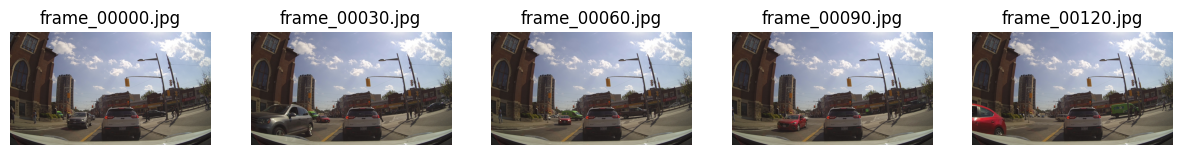

In [11]:
show_sample_frames("frames/set01/")

In [8]:
import os
import glob
from ultralytics import YOLO
from PIL import Image

def detect_objects_in_frames(frame_dir, model_name="yolov5s", save_dir="detections_output"):
    model = YOLO(model_name)  # Load model like 'yolov5s', 'yolov8n', etc.
    frame_files = sorted(glob.glob(os.path.join(frame_dir, "*.jpg")))

    os.makedirs(save_dir, exist_ok=True)

    for file in frame_files[:5]:  # Process first few
        results = model(file)
        # Save the image with detections
        save_path = os.path.join(save_dir, os.path.basename(file))
        results[0].save(filename=save_path)
        print(f"Saved: {save_path}")


In [9]:
detect_objects_in_frames("frames/set01", model_name="yolov8n", save_dir="detections/set01")


image 1/1 c:\Users\ual-laptop\Desktop\Manoj\PIE\frames\set01\frame_00000.jpg: 384x640 2 persons, 7 cars, 1 traffic light, 80.6ms
Speed: 5.4ms preprocess, 80.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Saved: detections/set01\frame_00000.jpg

image 1/1 c:\Users\ual-laptop\Desktop\Manoj\PIE\frames\set01\frame_00030.jpg: 384x640 7 cars, 1 traffic light, 80.0ms
Speed: 5.4ms preprocess, 80.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Saved: detections/set01\frame_00030.jpg

image 1/1 c:\Users\ual-laptop\Desktop\Manoj\PIE\frames\set01\frame_00060.jpg: 384x640 1 person, 5 cars, 1 train, 1 truck, 1 traffic light, 105.5ms
Speed: 4.2ms preprocess, 105.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Saved: detections/set01\frame_00060.jpg

image 1/1 c:\Users\ual-laptop\Desktop\Manoj\PIE\frames\set01\frame_00090.jpg: 384x640 1 person, 2 cars, 1 truck, 1 traffic light, 87.9ms
Speed: 6.2ms preprocess, 87.9ms inference, 1.3ms post